<a href="https://colab.research.google.com/github/UTSAVMON/Gradio-DL/blob/main/DL_Gradio_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gradio

In [3]:
import gradio as gr

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import datetime, os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
batch_size = 32
img_size = (240, 240)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning A1/train/train',
     shuffle=True, batch_size=batch_size, image_size=img_size,
    validation_split=0.2, subset='training', seed=42
)
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning A1/test/test',
    shuffle=True, batch_size=batch_size, image_size=img_size,
    validation_split=0.2, subset='validation', seed=42
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Deep Learning A1/test/test',
    shuffle=True, batch_size=batch_size, image_size=img_size
)

Found 900 files belonging to 3 classes.
Using 720 files for training.
Found 300 files belonging to 3 classes.
Using 60 files for validation.
Found 300 files belonging to 3 classes.


In [8]:
class_names = train_dataset.class_names
print(class_names)

['Dark', 'Light', 'Medium']


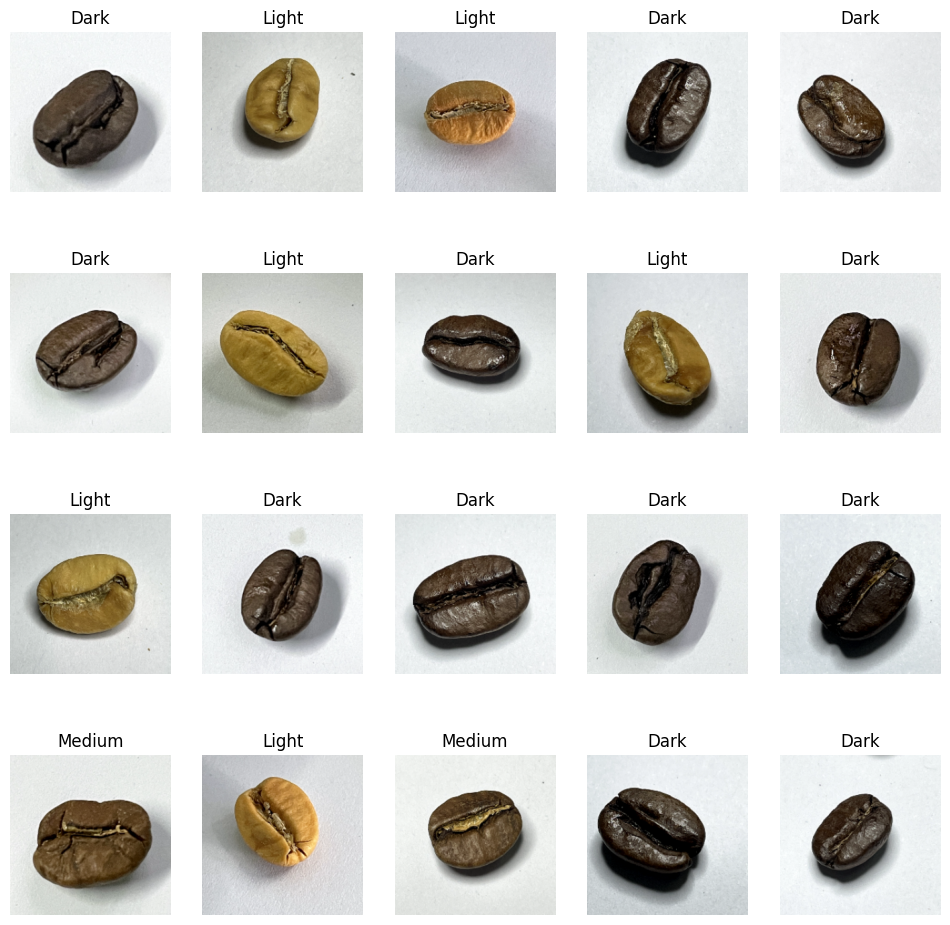

In [7]:
plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis('off')

In [9]:
base_model = keras.applications.xception.Xception(input_shape=(224, 224, 3),
                                                  weights='imagenet',
                                                  include_top=False)

83683744/83683744 [==============================] - 1s 0us/step


In [10]:

input = keras.layers.Input(shape=(240, 240, 3))

resized_input = keras.layers.Resizing(224, 224)(input)
preprocessed_input = keras.applications.xception.preprocess_input(resized_input)

flip = keras.layers.RandomFlip('horizontal')(preprocessed_input)
rotation = keras.layers.RandomRotation(0.2)(flip)
zoom = keras.layers.RandomZoom(0.2)(rotation)

base_model_output = base_model(zoom)

avg = keras.layers.GlobalAveragePooling2D()(base_model_output)

dropout = keras.layers.Dropout(0.2)(avg)
output = keras.layers.Dense(3, activation='softmax')(dropout)

model = keras.Model(inputs=input, outputs=output)

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
23/23 [==============================] - 214s 9s/step - loss: 1.1165 - accuracy: 0.4167 - val_loss: 0.9972 - val_accuracy: 0.4833
Epoch 2/10
23/23 [==============================] - 173s 8s/step - loss: 0.9804 - accuracy: 0.5042 - val_loss: 0.9001 - val_accuracy: 0.6167
Epoch 3/10
23/23 [==============================] - 176s 8s/step - loss: 0.8731 - accuracy: 0.6236 - val_loss: 0.8073 - val_accuracy: 0.7167
Epoch 4/10
23/23 [==============================] - 173s 7s/step - loss: 0.8195 - accuracy: 0.6681 - val_loss: 0.7324 - val_accuracy: 0.8333
Epoch 5/10
23/23 [==============================] - 173s 8s/step - loss: 0.7437 - accuracy: 0.7264 - val_loss: 0.6719 - val_accuracy: 0.8667
Epoch 6/10
23/23 [==============================] - 166s 7s/step - loss: 0.6919 - accuracy: 0.7514 - val_loss: 0.6220 - val_accuracy: 0.8833
Epoch 7/10
23/23 [==============================] - 173s 7s/step - loss: 0.6349 - accuracy: 0.8028 - val_loss: 0.5794 - val_accuracy: 0.8667
Epoch 8/10
23